HW_4 by 21600055 김동규

exercise 4,5,6,7

1. Objective: get eigen_value and eigen vector then get two large eigen vector, and inner project with train_set, visualize

2. Input: mnist.pkl file

3. Output: eigen_value,eigen_vector, image of two good vector, visualized MNIST data

In [86]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with open("./data/mnist.pkl","rb") as f:
    train_set, valid_set, test_set = pickle.load(f,encoding="latin1") # load mnist file
    
train_x, train_y = train_set # return each number's pixel brightness array and label array as tuple
test_x, test_y = test_set

train_x = pd.DataFrame(train_x) # make pixel brightness to data frame
train_y = pd.DataFrame(train_y, columns = ['label']) # make label array to dataframe
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns = ["label"])

train_data = pd.concat([train_x,train_y],axis = 1) # concatenate label to x
test_data = pd.concat([test_x,test_y],axis = 1)

In [87]:
#exercise 4: get covariance, eigen_value and eigen vector
train_x = train_data.iloc[:,:-1] # delte label column
train_y = train_data.iloc[:,-1]

cov_matrix = np.cov(train_x.T) # get covariance matrix 
eig_val, eig_vec = np.linalg.eig(cov_matrix) # get eigen value, eigen vectro

eig_vec = eig_vec.T # transpose eigen vector
print("20 eigen values of 784 eigen values: ",eig_val[:20]) # print 20 eigen vector

print("val: ",eig_val.shape)
print("vec: ",eig_vec.shape)

20 eigen values of 784 eigen values:  [5.10829281 3.70097988 3.25867822 2.82008442 2.54673474 2.26446711
 1.71820047 1.51312696 1.45150445 1.24028893 1.10062981 1.05915625
 0.89946813 0.88164617 0.82789811 0.78254504 0.69102204 0.66920675
 0.62200547 0.60339874]
val:  (784,)
vec:  (784, 784)


In [88]:
vector_index1 = eig_val.argmax() # get index of largest eigen value
temp = eig_val[1:] # slice largest value
vector_index2 = temp.argmax() + 1 # get index of 2nd large eigen value
print("largest eigen value:",eig_val[vector_index1],"index: ",vector_index1) # print largest eigen value and index
print("largest eigen value using max:",eig_val.max(),"index: ",eig_val.argmax())

print("2nd large eigen value:",eig_val[vector_index2],"index: ",vector_index2) # print 2nd large eigen value and index
print("2nd large eigen value using max:",temp.max(),"index: ",temp.argmax() + 1)

largest eigen value: 5.1082928096639275 index:  0
largest eigen value using max: 5.1082928096639275 index:  0
2nd large eigen value: 3.7009798824274203 index:  1
2nd large eigen value using max: 3.7009798824274203 index:  1


In [89]:
good_vecs = [eig_vec[vector_index1],eig_vec[vector_index2]] # make data frame from two eigen vectors
good_vecs = pd.DataFrame(good_vecs)
good_vecs

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000016,0.000008,0.000005,-2.695616e-07,-8.054013e-07,1.134790e-07,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000478,0.000235,0.000126,4.267252e-05,2.551548e-05,2.653200e-06,0.0,0.0,0.0,0.0


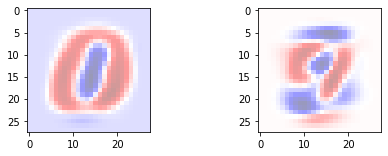

In [90]:
#exercise 5: visualize eigen vectors
plt.figure(figsize=(20,5))

for i,vec in good_vecs.iterrows():
    vec = vec.values.reshape((28,28)) # reshape image to 28 X 28 size
    ax = plt.subplot(2,5,i+1)
    plt.imshow(vec,alpha=0.4,cmap="seismic")

In [91]:
# exercise 6: inner project two eigen vectors with train_x onto PCA planes
project_x = train_x.dot(good_vecs.T).to_numpy() # calculate inner project two vectors and train_x
print("new data points' shape: ",train_x.shape,"X",good_vecs.T.shape, "=",project_x.shape)
print("project_x.shape:",project_x.shape,"train_y.shape:",train_y.shape)

new data points' shape:  (50000, 784) X (784, 2) = (50000, 2)
project_x.shape: (50000, 2) train_y.shape: (50000,)


In [92]:
project_x

array([[ 3.46685536, -1.34882173],
       [ 6.9269974 , -1.35360857],
       [ 2.80163484,  1.44592624],
       ...,
       [ 1.58028462, -2.05981304],
       [ 1.49791837,  0.92335676],
       [ 1.6089495 , -0.74843986]])

In [93]:
# exercise 6
new_coordinate = np.vstack((project_x.T,train_y)).T
dataframe = pd.DataFrame(new_coordinate) # make data frame
dataframe.rename(columns = {0:"1st_pca"}, inplace = True) # rename columns
dataframe.rename(columns = {1:"2nd_pca"},inplace = True)
dataframe.rename(columns = {2:"label"},inplace = True)
dataframe.head(3)

,1st_pca,2nd_pca,label
0,3.466855,-1.348822,5.0
1,6.926997,-1.353609,0.0
2,2.801635,1.445926,4.0


Text(0, 0.5, 'Principal COmponents 2')

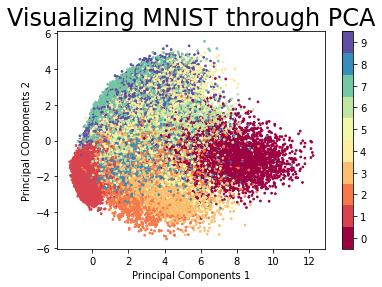

In [94]:
# exercise 7 :visualize 2-dim MNIST data
plt.scatter(project_x[:,0].real,project_x[:,1].real, s=3, c=train_y, cmap="Spectral")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10)) # make color bar

plt.title("Visualizing MNIST through PCA",fontsize = 24)
plt.xlabel("Principal Components 1")
plt.ylabel("Principal COmponents 2")